In [ ]:
'''
There will be three parts in presatation:
  *Introduction to dataset 
  *Run the code and explain the result
  *Share learning process

Part I -- Introduction to dataset
1.1 Basic Rules When Choose Dataset
  *Relevance
    ◇Whether it is relevent to military spending, whehter it contains all the infromation I need, such as years, countries
  *Timeliness
    ◇Whether it has latest five-year data
  *Authoritative resources
    ◇Data from authoritative resoureces will be more credible and the results will be more accurate
    ◇It's important in reality especially make prediction and choice based on the results
  
1.2 Outline of the dataset I choose
1.2.1 The source
  *Google with key words, look through each link until find the suitable one
  *Two resoureces:
    ◇SIPRI(STOCKHOLM INTERNATIONAL PEACE RESEARCH INSTITUTE)
    ◇The World Bank
1.2.2 The Content?
  *Military Spending: 
    ◇over 200 countries
    ◇from 1949 to 2016, USD
  *Share of GDP: 
    ◇miliraty spending to gdp
    ◇I use directly for Q2
  *Per capita military spending
    ◇which I use directly for Q4
  *Per capita GDP:
    ◇200 countries, 1960～2016
    ◇names of countries may not match, which needs to be repaired later
'''

In [462]:
'''
Part II -- Run the code and explain the results
'''
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline
matplotlib.style.use('ggplot')

from matplotlib import cm

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [463]:
'''
Part II -- Run the code and explain the results
2.1 Top 15 Military Spending countries from 2012~2016
2.1.1 Choose countries
'''
#open the dataset and learn about the basic infromation of the dataset
open('Current USD-Table 1.csv','r').readlines()[:10]
countries_all = pd.read_csv('Current USD-Table 1.csv',skiprows=5, skipfooter=8, index_col=0, engine='python')
countries_all.dtypes

#After checking the data, we found that there are NaN, 'xxx' and '..', and values are not float but object.
#Let's deal with the dataset and choose the latest five years.
countries_all = countries_all.replace('xxx',np.nan)
countries_all = countries_all.replace('. .',np.nan)
countries_1216 = countries_all[['2012','2013','2014','2015','2016']].dropna(axis = 0)

#Deal with the data type: convert object to float so that values can be calculated
#calculate the total military spending for 5 years and select the top 15 countries based on total military spending
countries_1216[['2012','2013','2014','2015','2016']] = countries_1216[['2012','2013','2014','2015','2016']].astype(str).astype(float)
countries_1216['total'] = countries_1216['2012']+countries_1216['2013']+countries_1216['2014']+countries_1216['2015']+countries_1216['2016']
countries_sort = countries_1216.sort_values(by='total',ascending=False)
countries_top15_total = countries_sort.head(15)
countries_top15_total

#After choosing the top 15 countries, drop the total column to make the dataset clean
countries_top15 = countries_top15_total.drop('total',1)
countries_top15

#creat a better dataframe
countries_top15_indexed = countries_top15.stack()
countries_top15_indexed = countries_top15_indexed.to_frame('column')
countries_top15_indexed.reset_index(inplace=True) 
countries_top15_indexed.columns = ['Country','Year','Military Spending']
countries_top15_indexed['Year'] = countries_top15_indexed['Year'].astype(str).astype(int)
countries_top15_indexed = countries_top15_indexed.set_index(['Country','Year'],inplace = False).sort_index()
countries_top15_indexed

Military Spending
Country            Year                   
Australia          2012            26217.0
                   2013            24825.0
                   2014            25784.0
                   2015            24040.0
                   2016            24617.0
Brazil             2012            33987.0
                   2013            32875.0
                   2014            32660.0
                   2015            24618.0
                   2016            23676.0
Canada             2012            20452.0
                   2013            18516.0
                   2014            17854.0
                   2015            15317.0
                   2016            15157.0
China, P.R.        2012           157390.0
                   2013           179880.0
                   2014           200772.0
                   2015           214093.0
                   2016           215176.0
France             2012            60035.0
                   2013            62417.0
                   2014            63614.0
                   2015            55342.0
                   2016            55745.0
Germany            2012            46471.0
                   2013            45931.0
                   2014            46103.0
                   2015            39813.0
                   2016            41067.0
...                                    ...
Korea, South       2012            31952.0
                   2013            34354.0
                   2014            37286.0
                   2015            36433.0
                   2016            36777.0
Russian Federation 2012            81469.0
                   2013            88353.0
                   2014            84697.0
                   2015            66419.0
                   2016            69245.0
Saudi Arabia       2012            56498.0
                   2013            67020.0
                   2014            80762.0
                   2015            87186.0
                   2016            63673.0
Turkey             2012            17958.0
                   2013            18663.0
                   2014            17772.0
                   2015            15881.0
                   2016            14803.0
UK                 2012            58496.0
                   2013            56862.0
                   2014            59183.0
                   2015            53862.0
                   2016            48253.0
USA                2012           684780.0
                   2013           639704.0
                   2014           609914.0
                   2015           596010.0
                   2016           611186.0

[75 rows x 1 columns]

In [464]:
'''
Part II -- Run the code and explain the results
2.1 Top 15 Military Spending countries from 2012~2016
2.1.2 Chart to compare
'''
#Make a chart to observe the change of a country's military spending these five years

def plotcountry(country):
    data = countries_top15_indexed.loc[country]
    pp.plot(data.index, data.values, color='b', linestyle='solid', marker='o', markerfacecolor='b', markersize=10) 
    for a,b in zip(data.index, data.values):
        pp.text(a, b, str(b),color='cornflowerblue')
    pp.xlabel("Year")
    pp.ylabel("Military Spending")
    pp.title('Military Spending 2012~2016')
    pp.text
    pp.show()


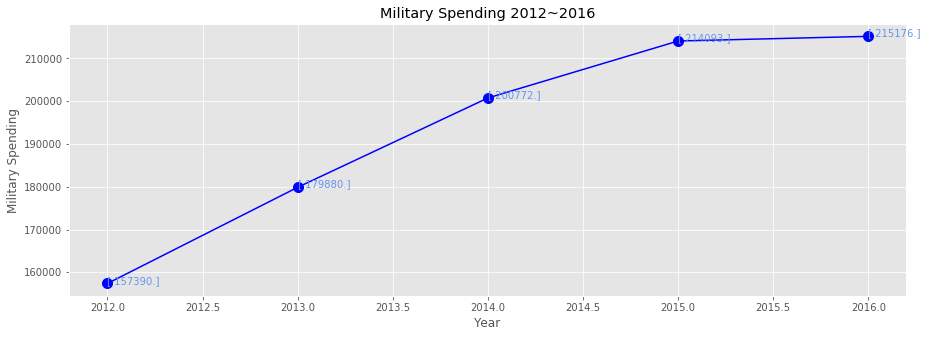

In [465]:
'''
Part II -- Run the code and explain the results
2.1 Top 15 Military Spending countries from 2012~2016
2.1.2 Chart to compare
  *China: From the line, we can see that the amount that China spent on military goes all the way 
          up in these five years, from 157390 in 2012 to 215176 in 2016, which means maybe China has 
          been devoted to developing military these years. 
'''
#Let's see check china first
pp.figure(figsize=(15,5))
plotcountry('China, P.R.')


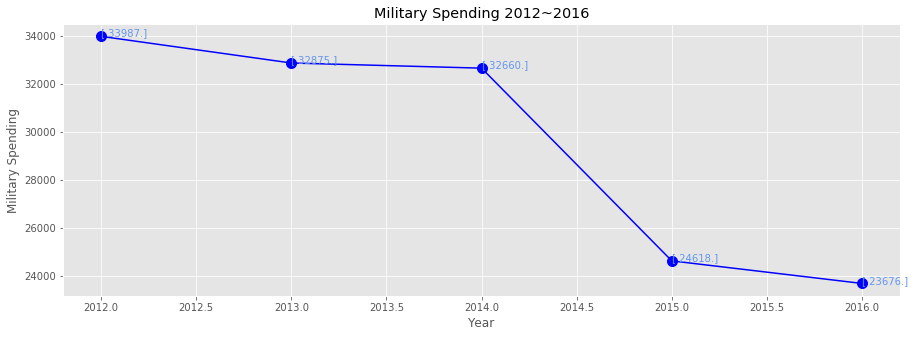

In [466]:
'''
Part II -- Run the code and explain the results
2.1 Top 15 Military Spending countries from 2012~2016
2.1.2 Chart to compare
  *Brazil: Compared with China, Brazil really has a total different trend which went down these
              five years, especially in 2014, the line dropped dramatically, which might show Brazil 
              is in a stable condition.
'''
#Then, let's check Aurtralia
pp.figure(figsize=(15,5))
plotcountry('Brazil')


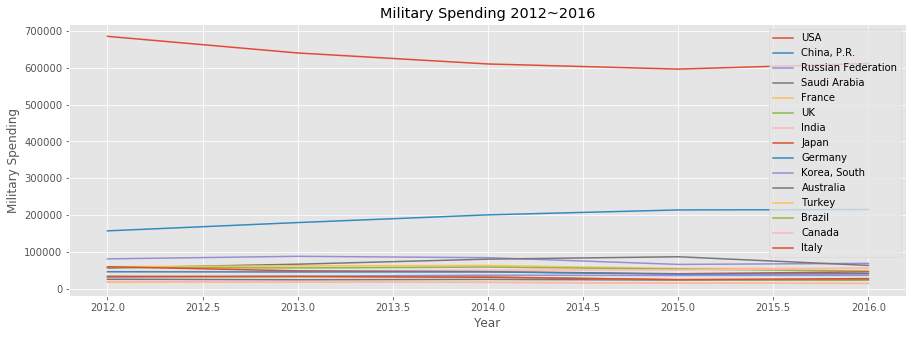

In [467]:
'''
Part II -- Run the code and explain the results
2.1 Top 15 Military Spending countries from 2012~2016
2.1.2 Chart to compare
  *Top 15: It's hard to compare changes among countries, because the military spendings of USA 
           and China are so high that other countries' lines are thickly dotted at the bottom.
'''

#Let's compare among top 15 conuntries in one plot
pp.figure(figsize=(15,5))

def plotcountry_mul(country):
    data = countries_top15_indexed.loc[country]
    pp.plot(data.index, data.values)
    pp.xlabel("Year")
    pp.ylabel("Military Spending")
    pp.title('Military Spending 2012~2016')

countries = ['USA','China, P.R.','Russian Federation','Saudi Arabia','France','UK','India','Japan','Germany','Korea, South','Australia','Turkey','Brazil','Canada','Italy']
for country in countries:
    plotcountry_mul(country)

pp.legend(countries)


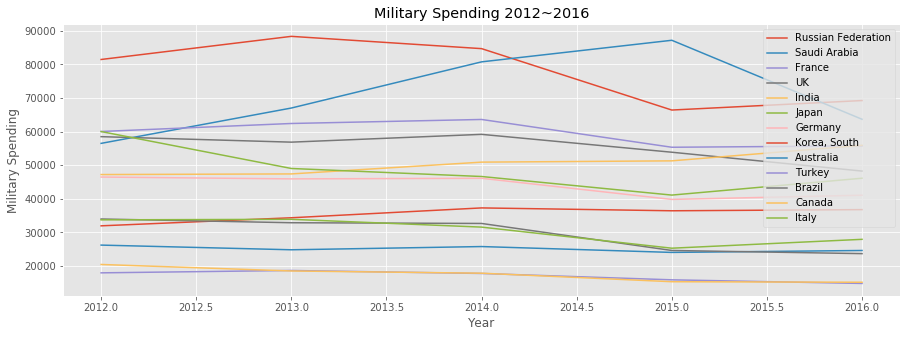

In [468]:
'''
Part II -- Run the code and explain the results
2.1 Top 15 Military Spending countries from 2012~2016
2.1.2 Chart To Compare
  *Top 13: As we can see from the chart, some countries, such as Saudi adn Russian, had sudden 
           turning point, but some countries, such UK,Canada and Turkey, had a more gentle trend.
           In chart like this, not only can we compare the trend, but also the absolute values
'''
#let's wipe out USA and China and to see other countries' military spending conditions more clearly.

pp.figure(figsize=(15,5))
countries_13 = ['Russian Federation','Saudi Arabia','France','UK','India','Japan','Germany','Korea, South','Australia','Turkey','Brazil','Canada','Italy']

for country in countries_13:
    plotcountry_mul(country)

pp.legend(countries_13)


In [469]:
'''
Part II -- Run the code and explain the results
2.2 Share Of GDP
2.2.1 Choose Top 15 Share Of GDP 
'''
#open the dataset and learn about the basic infromation of the dataset
open('Share of GDP-Table 1.csv','r').readlines()[:10]
gdp_all = pd.read_csv('Share of GDP-Table 1.csv',skiprows=5, skipfooter=8, index_col=0, engine='python')
gdp_all.dtypes

#After checking the data, we found that there are NaN, 'xxx' and '..', and values are not float but object.
#Let's deal with the dataset, choose the latest five years and locate the top 15 countries.
gdp_all = gdp_all.replace('xxx',np.nan)
gdp_all = gdp_all.replace('. .',np.nan)
gdp_all_1216 = gdp_all[['2012','2013','2014','2015','2016']].dropna(axis = 0)
countries = ['USA','China, P.R.','Russian Federation','Saudi Arabia','France','UK','India','Japan','Germany','Korea, South','Australia','Turkey','Brazil','Canada','Italy']
gdp_top15_indexed = gdp_all_1216.loc[countries]


#creat a new dataframe
gdp_top15_indexed = gdp_top15_indexed.stack()
gdp_top15_indexed = gdp_top15_indexed.to_frame('column')
gdp_top15_indexed.reset_index(inplace=True)  
gdp_top15_indexed.columns = ['Country','Year','Percentage']
gdp_top15_indexed['Year'] = gdp_top15_indexed['Year'].astype(str).astype(int)
gdp_top15_indexed['Percentage']  = gdp_top15_indexed['Percentage'].replace('%','',regex=True).astype('float')/100
gdp_top15_preindexed = gdp_top15_indexed
gdp_top15_indexed = gdp_top15_indexed.set_index(['Country'],inplace = False).sort_index()
gdp_top15_indexed

,Year,Percentage
Country,,
Australia,2016,0.020
Australia,2015,0.020
Australia,2012,0.017
Australia,2014,0.018
Australia,2013,0.017
Brazil,2014,0.014
Brazil,2012,0.015
Brazil,2013,0.015
Brazil,2015,0.014


In [470]:
'''
Part II -- Run the code and explain the results
2.2 Share Of GDP
2.2.2 Chart To Compare
'''
#Make a plot to see the changes of share of GDP for a country
pp.figure(figsize=(15,5))

def scatter_plot(country):
    data = gdp_top15_indexed.loc[country]
    pp.scatter(data.Year, data.Percentage, c='lightskyblue', s = data.Percentage*10**4)
    for a,b in zip(data.Year, data.Percentage):
        pp.text(a, b, str(b),color='b',horizontalalignment='left',verticalalignment='top')
    pp.xlabel("Year")
    pp.ylabel("Percentage Value")
    pp.title('Share of GDP 2012~3016')
    pp.text
    pp.show()

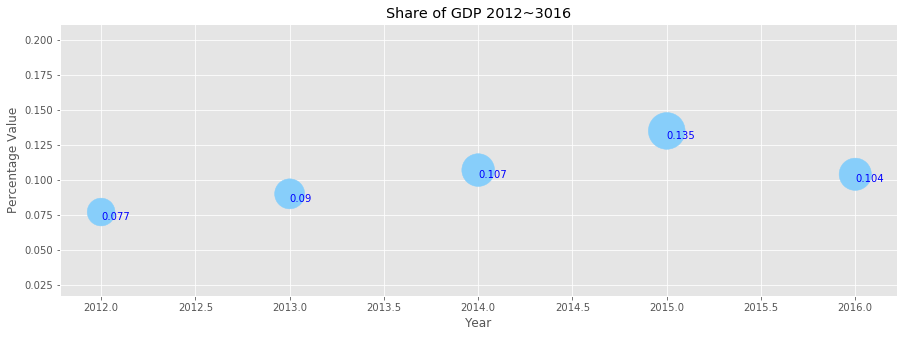

In [471]:
'''
Part II -- Run the code and explain the results
2.2 Share Of GDP
2.2.2 Chart To Compare
  *Saudi: Saudi showed a up trend from 2012 to 2015, but it's share of GDP went down in 2015 when 
          the absolute spending also dropped a lot.
'''
#Let's check Saudi.
pp.figure(figsize=(15,5))
scatter_plot('Saudi Arabia')


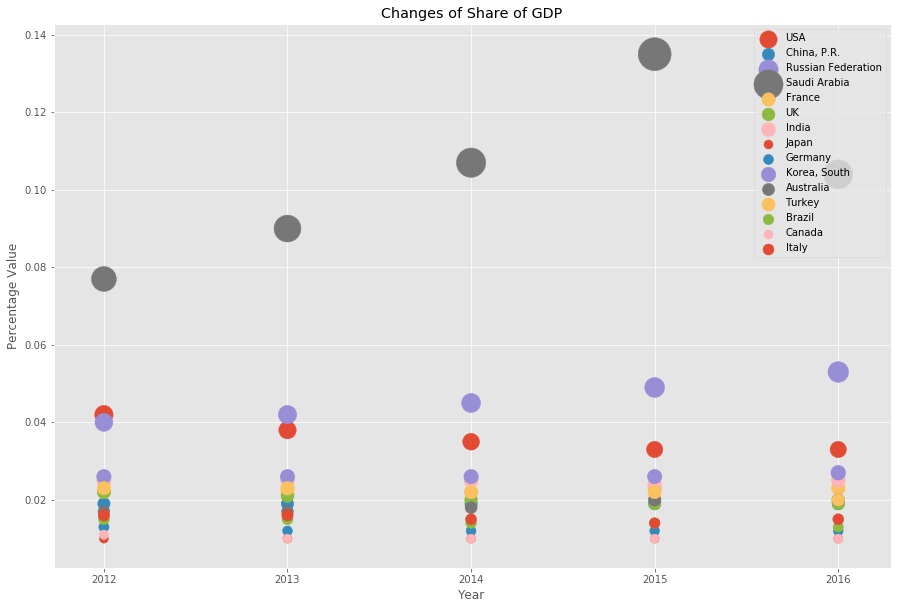

In [472]:
'''
Part II -- Run the code and explain the results
2.2 Share Of GDP
2.2.2 Chart To Compare
  *Top15: Besides Saudi, all countries keep military spending share of GDP below 6%, which means 
  Saudi may concern more about military than other countries.
'''
#Let's compare change of top 15 conuntries' military spending in one plot

pp.figure(figsize=(15,10))

def scatter_mul(country):
    data = gdp_top15_indexed.loc[country]
    pp.scatter(data.Year, data.Percentage,s = data.Percentage*20**3)
    pp.xlabel("Year")
    pp.ylabel("Percentage Value")
    pp.title('Changes of Share of GDP')
    
countries = ['USA','China, P.R.','Russian Federation','Saudi Arabia','France','UK','India','Japan','Germany','Korea, South','Australia','Turkey','Brazil','Canada','Italy']

for country in countries:
    scatter_mul(country)

pp.legend(countries,loc='upper right')



In [473]:
'''
Part II -- Run the code and explain the results
2.3 Share Of Overall Top15
2.3.1 Calculation
'''
#Let's compare these top 15 countries military spending in a pie chart
#First, let's deal with dataset

#calculate totoal spending of 15 countries and each country's share 
total = countries_top15_total['total'].sum()
countries_top15_percentage = countries_top15_total[['total']]
countries_top15_percentage['Per_total(%)'] = countries_top15_percentage['total']/total*100
countries_top15_percentage = countries_top15_percentage[['Per_total(%)']]
countries_top15_percentage = countries_top15_percentage.sort_index()
countries_top15_percentage


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Per_total(%)
Country,
Australia,1.813869
Brazil,2.136695
Canada,1.261872
"China, P.R.",13.982576
France,4.295376
Germany,3.171232
India,3.653570
Italy,2.203333
Japan,3.511144


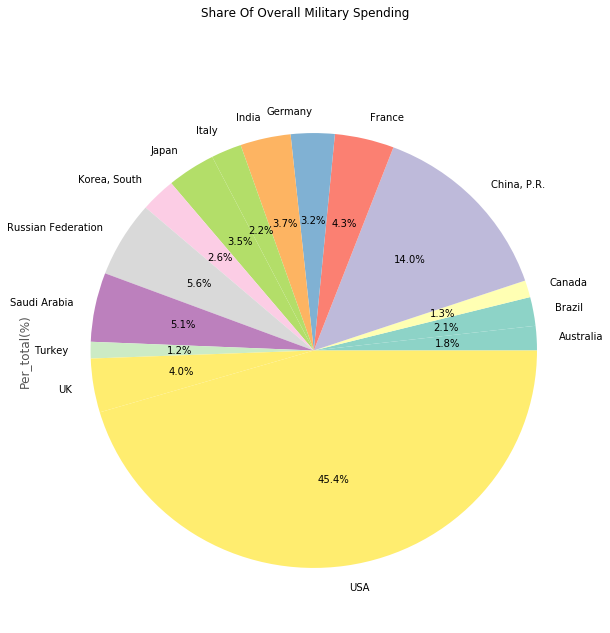

In [474]:
'''
Part II -- Run the code and explain the results
2.3 Share Of Overall Top15
2.3.2 Chart To Compare
  *Total: USA's military spending takes 45.4% of the total military spending of top 15 countries, 
          but only takes about 3.5% of GDP, which shows USA is a super country with a large economy.
          The second large share comes from China taking 14.0%. From the chart above we know that 
          though its spending varied from years, its share of GDP is stable around 2%, which might 
          mean that the military coordinated develop with economy.
'''
# creat a pie chart to compare the data to the overall military spending of the top 15 countries for five years
countries_top15_percentage.plot.pie(subplots=True,
                                    colormap='Set3',
                                    autopct='%1.1f%%',
                                    fontsize=10,
                                    figsize=(10,10),
                                    legend=False,
                                    title='Share Of Overall Military Spending')
pp.show()


In [475]:
'''
Part II -- Run the code and explain the results
2.3 Share Of Overall Top15
2.3.3 Chart To Copmare from 2012~2016
'''

#We can also see the share of each country in top 15 countries variation from 2012 to 2016 through area chart
#First, let's calculate the percentage from 2012 to 2016
countries_top15_total = countries_top15

total_12 = countries_top15['2012'].sum()
total_13 = countries_top15['2013'].sum()
total_14 = countries_top15['2014'].sum()
total_15 = countries_top15['2015'].sum()
total_16 = countries_top15['2016'].sum()

countries_top15_total['2012'] = countries_top15_total['2012']/total_12*100
countries_top15_total['2013'] = countries_top15_total['2013']/total_13*100
countries_top15_total['2014'] = countries_top15_total['2014']/total_14*100
countries_top15_total['2015'] = countries_top15_total['2015']/total_15*100
countries_top15_total['2016'] = countries_top15_total['2016']/total_16*100

countries_top15_total

#Let's create a new dataframe
countries_top15_per_indexed = countries_top15_total.stack()
countries_top15_per_indexed = countries_top15_per_indexed.to_frame('column')
countries_top15_per_indexed.reset_index(inplace=True)  
countries_top15_per_indexed.columns = ['Country','Year','Percentage']
countries_top15_per_indexed['Year'] = countries_top15_per_indexed['Year'].astype(str).astype(int)
countries_top15_per_indexed = countries_top15_per_indexed.set_index(['Country','Year'],inplace = False).sort_index()
countries_top15_per_indexed

Percentage
Country            Year            
Australia          2012    1.850611
                   2013    1.773569
                   2014    1.834479
                   2015    1.785095
                   2016    1.824349
Brazil             2012    2.399082
                   2013    2.348684
                   2014    2.323692
                   2015    1.828015
                   2016    1.754612
Canada             2012    1.443670
                   2013    1.322836
                   2014    1.270275
                   2015    1.137367
                   2016    1.123275
China, P.R.        2012   11.109880
                   2013   12.851142
                   2014   14.284515
                   2015   15.897519
                   2016   15.946546
France             2012    4.237764
                   2013    4.459249
                   2014    4.526005
                   2015    4.109431
                   2016    4.131224
Germany            2012    3.280305
                   2013    3.281442
                   2014    3.280134
                   2015    2.956322
                   2016    3.043447
...                             ...
Korea, South       2012    2.255435
                   2013    2.454348
                   2014    2.652822
                   2015    2.705340
                   2016    2.725518
Russian Federation 2012    5.750752
                   2013    6.312191
                   2014    6.026017
                   2015    4.931956
                   2016    5.131700
Saudi Arabia       2012    3.988093
                   2013    4.788100
                   2014    5.746050
                   2015    6.474014
                   2016    4.718763
Turkey             2012    1.267623
                   2013    1.333338
                   2014    1.264441
                   2015    1.179247
                   2016    1.097040
UK                 2012    4.129128
                   2013    4.062384
                   2014    4.210749
                   2015    3.999534
                   2016    3.575997
USA                2012   48.337400
                   2013   45.702283
                   2014   43.394127
                   2015   44.256843
                   2016   45.294577

[75 rows x 1 columns]

In [476]:
'''
Part II -- Run the code and explain the results
2.3 Share Of Overall Top15
2.3.3 Chart To Copmare from 2012~2016
  *USA, China, Canada: From the cumulative area chart, we can compare clearly both the share of 
                       each country and the change over time. Obviously, USA is still the country 
                       taking almost 50% of total and this situation has not changed from 2012 to 2016. 
                       All these countries have a drop at 2014, which means some other country increase 
                       its military spending more than usual at 2014.
'''
#Let's ues plotly to make area chart of USA, China and Canada 

py.sign_in('XiaoqianSun','AaodLhc0SqgHzU60QJm1')
print(plotly.__version__)
plotly.offline.init_notebook_mode()

# Add original data
x = countries_top15_per_indexed.loc['USA'].index.values

countries = ['USA','China, P.R.','Russian Federation','Saudi Arabia','France','UK','India','Japan','Germany','Korea, South','Australia','Turkey','Brazil','Canada','Italy']

def y(country):
    data = countries_top15_per_indexed.loc[country]
    y = data.values[:,0]
    return y

y0_org=y("USA")
y1_org=y("China, P.R.")
y2_org=y("Canada")

# Make original values strings and add % for hover text
y0_txt=[str(y0)+'%' for y0 in y0_org]
y1_txt=[str(y1)+'%' for y1 in y1_org]
y2_txt=[str(y2)+'%' for y2 in y2_org]

# Add data to create cumulative stacked values
y0_stck=y0_org
y1_stck=[y0+y1 for y0, y1 in zip(y0_org, y1_org)]
y2_stck=[y0+y1+y2 for y0, y1, y2 in zip(y0_org, y1_org, y2_org)]


Per_USA = go.Scatter(
    x=x,
    y=y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(184, 247, 212)'),
    fill='tonexty',
    name = 'USA'
)
Per_China = go.Scatter(
    x=x,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(111, 231, 219)'),
    fill='tonexty',
    name = 'China'
)
Per_Canada = go.Scatter(
    x=x,
    y=y2_stck,
    text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5,
              color='rgb(131, 90, 241)'),
    fill='tonexty',
    name = 'Canada'
)
data = [Per_USA, Per_China, Per_Canada]

fig = go.Figure(data=data)

py.iplot(fig, filename='Area Chart Of Overall Share')


2.0.15


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [477]:
'''
Part II -- Run the code and explain the results
2.4 Per Capita Military Spending(PCMS) to Per Capita GDP(PCGDP)
2.4.1 Calculation
'''
#Deal with raw dataset--per capita ms.csv and per capita gdp
#Merge and creat a new dataframe to compare per capita military spending to per capita gdp

#Deal with per capita gdp dataset and select top 15 countries
open('API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv','r').readlines()[:10]
per_gdp = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv', skiprows=4, skipfooter=7, index_col=0, engine='python')
per_gdp = per_gdp[['2012','2013','2014','2015','2016']].dropna(axis = 0)
per_gdp_indexed = per_gdp.reindex(per_gdp.index.rename('country')).sort_index()

countries_gdp = ['United States','China','Russian Federation','Saudi Arabia','France','United Kingdom','India','Japan','Germany','Korea, Rep.','Australia','Turkey','Brazil','Canada','Italy']
per_gdp_top15_indexed = per_gdp_indexed.loc[countries_gdp]

#After locating the dataframe, we find that some rows of values are NaN which is because index values mismatch
per_gdp_top15_indexed  = per_gdp_top15_indexed.rename(index = {'China':'China, P.R.',
                                                               'United Kingdom':'UK',
                                                               'Korea, Rep.':'Korea, South',
                                                               'United States':'USA'})

per_gdp_top15_indexed.columns = ['2012_gdp','2013_gdp','2014_gdp','2015_gdp','2016_gdp']

#---------------------DEAL WITH ANOTHER DATASET---------------------#

#deal with per capita military spending dataset: select top 15 countries
open('Per capita-Table 1.csv','r').readlines()[:10]
per_ms = pd.read_csv('Per capita-Table 1.csv',skiprows=6, skipfooter=8, index_col=0, engine='python')
per_ms = per_ms.replace('xxx',np.nan)
per_ms = per_ms.replace('. .',np.nan)
per_ms_1216 = per_ms[['2012','2013','2014','2015','2016']].dropna(axis = 0)
per_ms = per_ms[['2012','2013','2014','2015','2016']].dropna(axis = 0)

per_ms[['2012','2013','2014','2015','2016']] = per_ms[['2012','2013','2014','2015','2016']].astype(str).astype(float)


countries = ['USA','China, P.R.','USSR/Russia','Saudi Arabia','France','UK','India','Japan','Germany','Korea, South','Australia','Turkey','Brazil','Canada','Italy']
per_ms_top15_indexed = per_ms.loc[countries]

per_ms_top15_indexed.columns = ['2012_ms','2013_ms','2014_ms','2015_ms','2016_ms']

#merge two dataframe
per_top15 = pd.merge(per_ms_top15_indexed, per_gdp_top15_indexed, left_index=True, right_index = True)

#calculate per capita military spending to per capita gdp, add to new columns and select the final columns
per_top15['2012'] = per_top15['2012_ms']/per_top15['2012_gdp']*100
per_top15['2013'] = per_top15['2013_ms']/per_top15['2013_gdp']*100
per_top15['2014'] = per_top15['2014_ms']/per_top15['2014_gdp']*100
per_top15['2015'] = per_top15['2015_ms']/per_top15['2015_gdp']*100
per_top15['2016'] = per_top15['2016_ms']/per_top15['2016_gdp']*100
per_top15 = per_top15[['2012','2013','2014','2015','2016']]
per_top15[:3]

#creat a better dataframe
per_top15 = per_top15.stack()
per_top15 = per_top15.to_frame('column')
per_top15.reset_index(inplace=True)  
per_top15.columns = ['Country','Year','Percentage(%)']
per_top15['Year'] = per_top15['Year'].astype(str).astype(int)
per_top15_indexed = per_top15.set_index(['Country','Year'],inplace = False).sort_index()
per_top15_indexed

Percentage(%)
Country      Year               
Australia    2012       1.690810
             2013       1.573630
             2014       1.754411
             2015       1.773525
             2016       2.028328
Brazil       2012       1.365988
             2013       1.317028
             2014       1.317910
             2015       1.352029
             2016       1.306366
Canada       2012       1.117404
             2013       1.002791
             2014       0.994639
             2015       0.983939
             2016       0.991035
China, P.R.  2012       1.831842
             2013       1.864994
             2014       1.907984
             2015       1.928317
             2016       1.916737
France       2012       2.312796
             2013       2.297310
             2014       2.309613
             2015       2.352795
             2016       2.339983
Germany      2012       1.310330
             2013       1.225207
             2014       1.193462
             2015       1.198245
             2016       1.214468
...                          ...
Japan        2012       0.971124
             2013       0.954407
             2014       0.965450
             2015       0.941865
             2016       0.939465
Korea, South 2012       2.644221
             2013       2.662030
             2014       2.677323
             2015       2.672562
             2016       2.646447
Saudi Arabia 2012       7.569825
             2013       8.899758
             2014      10.639907
             2015      13.332940
             2016       9.876852
Turkey       2012       2.046874
             2013       1.951696
             2014       1.889962
             2015       1.838877
             2016       1.723273
UK           2012       2.215064
             2013       2.096569
             2014       1.982241
             2015       1.894618
             2016       1.857923
USA          2012       4.227978
             2013       3.821204
             2014       3.496979
             2015       3.295495
             2016       3.282244

[70 rows x 1 columns]

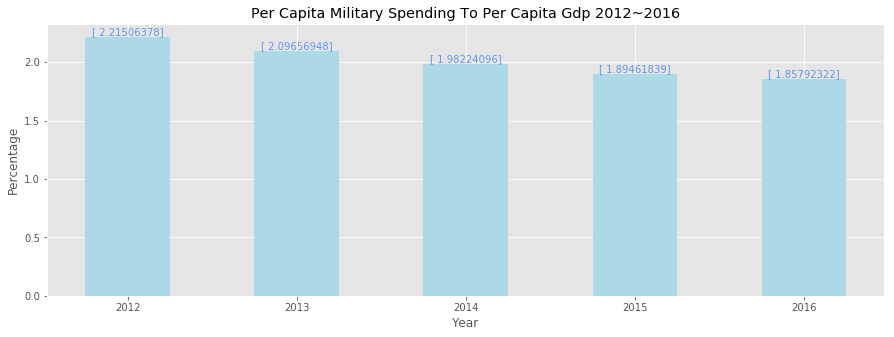

In [478]:
'''
Part II -- Run the code and explain the results
2.4 Per Capita Military Spending(PCMS) to Per Capita GDP(PCGDP)
2.4.2 Chart To Compare
  *Per capita gdp: a useful measure of a country's standard of living. Higher per capita gdp means higher 
                   standard of living
  *UK: the percentage of PCMS to PCGDP was going down in UK from 2012 to 2016, from 2.22 to 1.86, which may
       show that the UK people have more money to spend on others.
'''
#creat a bar chart to see the change of percentage of per capita military spending to per capita gdp of a country from 2012 to 2016

def bar_per(country):
    data = per_top15_indexed.loc[country]
    pp.bar(data.index, data.values, color='lightblue',width = 0.5) 
    for a,b in zip(data.index, data.values):
        pp.text(a, b, str(b),color='cornflowerblue',horizontalalignment='center',verticalalignment='bottom')
    pp.xlabel("Year")
    pp.ylabel("Percentage")
    pp.title('Per Capita Military Spending To Per Capita Gdp 2012~2016')

pp.figure(figsize=(15,5))
bar_per('UK')

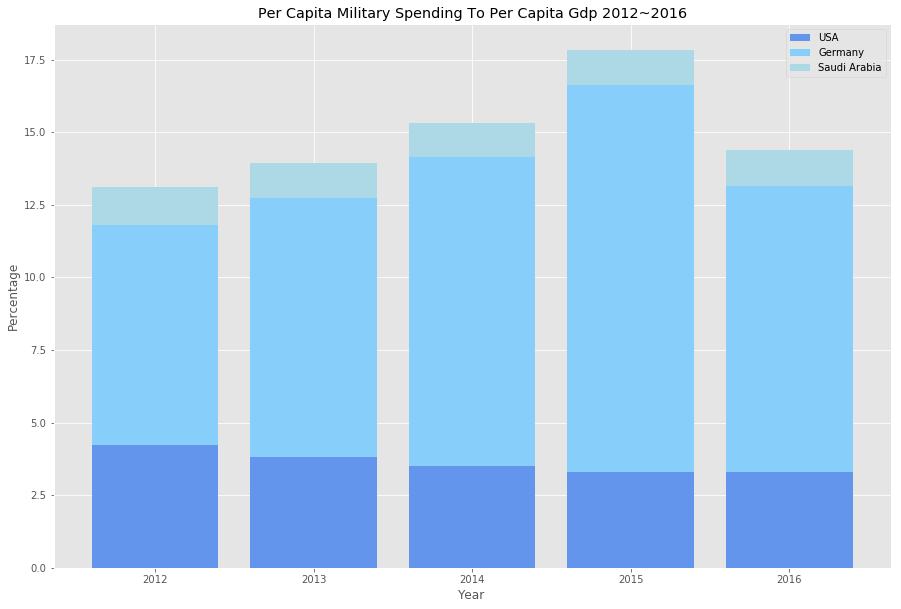

In [479]:
'''
Part II -- Run the code and explain the results
2.4 Per Capita Military Spending(PCMS) to Per Capita GDP(PCGDP)
2.4.2 Chart To Compare
  *USA, Germany, Saudi: Germany has the most percentage in these three countries, which may show that 
                        Germany may be the country which pays most attention to military.
                        We can also see that the percentage of USA was going down these years, which may also
                        show the quality of life improved.
'''
#Create a stacked bar chart to compare random 3 countreis, maybe:'USA', 'Germany' and 'Saudi Arabia'
pp.figure(figsize=(15,10))
ind = np.arange(2012,2017)

p1 = pp.bar(ind, per_top15_indexed.loc['USA'].values,color='cornflowerblue')
p2 = pp.bar(ind, per_top15_indexed.loc['Saudi Arabia'].values, bottom = per_top15_indexed.loc['USA'].values,color='lightskyblue')
p3 = pp.bar(ind, per_top15_indexed.loc['Germany'].values, bottom=[sum(x) for x in zip(per_top15_indexed.loc['USA'].values,per_top15_indexed.loc['Saudi Arabia'].values)],color='lightblue')

pp.xlabel("Year")
pp.ylabel("Percentage")
pp.title('Per Capita Military Spending To Per Capita Gdp 2012~2016')
pp.legend(['USA','Germany','Saudi Arabia'],loc='upper right')


In [480]:
'''
Part II -- Run the code and explain the results
2.5 Fastest growing country
2.5.1 Calculation
'''
#Let's figure which country is the fast growing one based on fixed value and percentage.
#I'll compare AAGR(Average Annual Growth Rate) and CAGR(Compound Annual Growth Rate) among countries.
#First, let's deal with the dataset.

countries_top15['AAGR'] = (((countries_top15['2013']/countries_top15['2012'])-1)+((countries_top15['2014']/countries_top15['2013'])-1)+((countries_top15['2015']/countries_top15['2014'])-1)+((countries_top15['2016']/countries_top15['2015'])-1))/4
countries_top15['CAGR'] = (countries_top15['2016']/countries_top15['2012'])**(1/4)-1
countries_growth_sorted = countries_top15.sort_values(['AAGR','CAGR'],ascending = False)
countries_growth_sorted


,2012,2013,2014,2015,2016,AAGR,CAGR
Country,,,,,,,
"China, P.R.",11.109880,12.851142,14.284515,15.897519,15.946546,0.096068,0.094559
Saudi Arabia,3.988093,4.788100,5.746050,6.474014,4.718763,0.064059,0.042955
India,3.332964,3.386677,3.622426,3.808921,4.144415,0.056323,0.055986
"Korea, South",2.255435,2.454348,2.652822,2.705340,2.725518,0.049079,0.048467
Australia,1.850611,1.773569,1.834479,1.785095,1.824349,-0.003054,-0.003567
France,4.237764,4.459249,4.526005,4.109431,4.131224,-0.004876,-0.006345
USA,48.337400,45.702283,43.394127,44.256843,45.294577,-0.015423,-0.016123
Germany,3.280305,3.281442,3.280134,2.956322,3.043447,-0.017325,-0.018562
Russian Federation,5.750752,6.312191,6.026017,4.931956,5.131700,-0.022191,-0.028072


In [481]:
'''
Part II -- Run the code and explain the results
2.5 Fastest growing country
2.5.2 Explain
  *China: After calculating AAGR and CAGE, which have small gap, we find China has the fast 
          growth rate, nearly 9.5%. Many countries have negative growth rate, such as Brazil.
          To some extent, I think the decrease of the growth rate means disposable personal income 
          may also increase according to the economic environment. The faster growth rate may not 
          represent higher quality of life, and it just shows the country pays more attention to develop military.
'''
#Let's make chart to compare the growth rate.
countries_growth_sorted_top1 = countries_growth_sorted[:1]
countries_growth_sorted_top1

,2012,2013,2014,2015,2016,AAGR,CAGR
Country,,,,,,,
"China, P.R.",11.10988,12.851142,14.284515,15.897519,15.946546,0.096068,0.094559


In [ ]:
'''
Part III -- Share Learning Process
I really learned a lot from completing the project all by myself.
*Dealling with errors is a process of keeping trying, denying and correcting yourself.
  ◇How to solve errors: 
    >guess what will cause the error, find defination of the function
    >try to verify the hypothesis by adjusting code by myself first
    >if not work, google and try solutions provided by others
  ◇Finding and solving problems help you understand the function better 
  ◇The process helps you establish a intuition about coding and solving
*Refine the code
  ◇Try to make every step understandable
  ◇Try to code more cleanly and succinctly
  ◇Try to make the chart prettier
The best thing I've got from the project is that I find coding is really interesting and I want to learn more.
'''